# Morphology Measures and their statistics
In this notebook, we establish the use of the statmorph package to obtain morphological measures from individual galaxy images. These measures will be used to verify that a sample of generated galaxies reflects the morphological statistics of the real training sample.

## Tutorial
following https://statmorph.readthedocs.io/en/latest/notebooks/tutorial.html#Running-statmorph
we first generate a particular galaxy with known measures to test the procedure of obtaining these measures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import scipy.ndimage as ndi
from astropy.visualization import simple_norm
from astropy.modeling import models
from astropy.convolution import convolve
import photutils
import time
import statmorph

In [2]:
def print_image_stats(image):
    print("min", image.min(), "max", image.max(), "shape", image.shape)


### create raw galaxy image

In [3]:
sersic_model?

Object `sersic_model` not found.


min 2.1570198659627895e-06 max 0.41880298924731185 shape (64, 64)


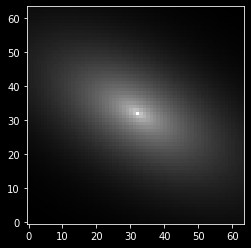

In [4]:
n = 64
ny, nx = n, n
y, x = np.mgrid[0:ny, 0:nx]
sersic_model = models.Sersic2D(
    amplitude=1, r_eff=8, n=2.5, x_0=n/2, y_0=n/2,
    ellip=0.5, theta=-0.5)
image = sersic_model(x, y)
plt.imshow(image, cmap='gray', origin='lower',
           norm=simple_norm(image, stretch='log', log_a=10000))
image /= 255
print_image_stats(image)

### convolve with PSF

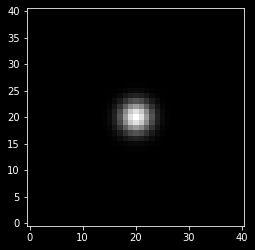

In [5]:
size = 20  # on each side from the center
sigma_psf = 2.0
y, x = np.mgrid[-size:size+1, -size:size+1]
psf = np.exp(-(x**2 + y**2)/(2.0*sigma_psf**2))
psf /= np.sum(psf)
plt.imshow(psf, origin='lower', cmap='gray')

min 9.593873110839313e-07 max 0.03350084261875821 shape (64, 64)


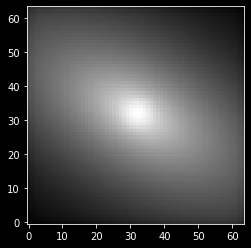

In [6]:
image = convolve(image, psf)
plt.imshow(image, cmap='gray', origin='lower',
           norm=simple_norm(image, stretch='log', log_a=10000))
print_image_stats(image)

### add noise

min -0.00025931748730988267 max 0.03334815398219584 shape (64, 64)


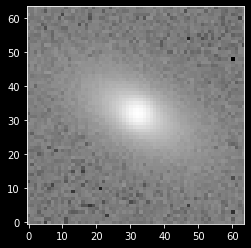

In [7]:
np.random.seed(1)
snp = 10000.0
image += (1.0 / snp) * np.random.standard_normal(size=(ny, nx))
plt.imshow(image, cmap='gray', origin='lower',
           norm=simple_norm(image, stretch='log', log_a=10000))
print_image_stats(image)

### Create segmentation map

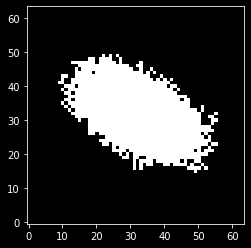

In [8]:
threshold = photutils.detect_threshold(image, 1.5)
npixels = 5  # minimum number of connected pixels
segm = photutils.detect_sources(image, threshold, npixels)

# only use largest source

# Keep only the largest segment
label = np.argmax(segm.areas) + 1
segmap = segm.data == label
plt.imshow(segmap, origin='lower', cmap='gray')

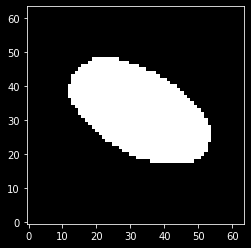

In [9]:
# we further regularize the shape
segmap_float = ndi.uniform_filter(np.float64(segmap), size=10)
segmap = segmap_float > 0.5
plt.imshow(segmap, origin='lower', cmap='gray')

### obtain parameters

In [10]:
# renormalize image to 0-1
#image += image.min()
image[image<0] = 0



In [11]:
gain = 10000.0 # assume average of 10,000 electrons per pixel
morphology_measures = statmorph.source_morphology(image, segmap, gain=gain)

In [12]:
morphology_measures = morphology_measures[0]


In [13]:
morph = morphology_measures
print('xc_centroid =', morph.xc_centroid)
print('yc_centroid =', morph.yc_centroid)
print('ellipticity_centroid =', morph.ellipticity_centroid)
print('elongation_centroid =', morph.elongation_centroid)
print('orientation_centroid =', morph.orientation_centroid)
print('xc_asymmetry =', morph.xc_asymmetry)
print('yc_asymmetry =', morph.yc_asymmetry)
print('ellipticity_asymmetry =', morph.ellipticity_asymmetry)
print('elongation_asymmetry =', morph.elongation_asymmetry)
print('orientation_asymmetry =', morph.orientation_asymmetry)
print('rpetro_circ =', morph.rpetro_circ)
print('rpetro_ellip =', morph.rpetro_ellip)
print('rhalf_circ =', morph.rhalf_circ)
print('rhalf_ellip =', morph.rhalf_ellip)
print('r20 =', morph.r20)
print('r80 =', morph.r80)
print('Gini =', morph.gini)
print('M20 =', morph.m20)
print('F(G, M20) =', morph.gini_m20_bulge)
print('S(G, M20) =', morph.gini_m20_merger)
print('sn_per_pixel =', morph.sn_per_pixel)
print('C =', morph.concentration)
print('A =', morph.asymmetry)
print('S =', morph.smoothness)
print('M =', morph.multimode)
print('I =', morph.intensity)
print('D =', morph.deviation)
print('sersic_amplitude =', morph.sersic_amplitude)
print('sersic_amplitude =', morph.sersic_amplitude)
print('sersic_rhalf =', morph.sersic_rhalf)
print('sersic_n =', morph.sersic_n)
print('sersic_xc =', morph.sersic_xc)
print('sersic_yc =', morph.sersic_yc)
print('sersic_ellip =', morph.sersic_ellip)
print('sersic_theta =', morph.sersic_theta)
print('sky_mean =', morph.sky_mean)
print('sky_median =', morph.sky_median)
print('sky_sigma =', morph.sky_sigma)
print('flag =', morph.flag)
print('flag_sersic =', morph.flag_sersic)

xc_centroid = 32.06598115118838
yc_centroid = 32.06151514692858
ellipticity_centroid = 0.4326244613174792
elongation_centroid = 1.7625010805401633
orientation_centroid = -0.5071418028207423
xc_asymmetry = 31.990202537316556
yc_asymmetry = 32.00524509335245
ellipticity_asymmetry = 0.4324842391614728
elongation_asymmetry = 1.7620656006495046
orientation_asymmetry = -0.5070280781232228
rpetro_circ = 11.476036353552601
rpetro_ellip = 15.13592484570054
rhalf_circ = 5.468975663658979
rhalf_ellip = 7.244213749352645
r20 = 2.290817454622891
r80 = 9.374294408124282
Gini = 0.5461151923019436
M20 = -1.7997486108639422
F(G, M20) = -0.009504010776667293
S(G, M20) = -0.03651101653116384
sn_per_pixel = 6.076282868355278
C = 3.059740526474233
A = 0.024265213823664165
S = 0.07407639549572895
M = 0.0
I = 0.0
D = 0.0011346644491379261
sersic_amplitude = 0.005355227929140538
sersic_amplitude = 0.005355227929140538
sersic_rhalf = 7.129169736731595
sersic_n = 1.4610583788826654
sersic_xc = 32.03618010720358

In [14]:
print_image_stats(image)

min 0.0 max 0.03334815398219584 shape (64, 64)


## Galaxy Zoo Morphology

We now apply the galaxy morphology estimator to images of the Galaxy Zoo dataset

In [15]:
import sys
sys.path.insert(0,"./python_modules/")

from dataset import MakeDataLoader



!!!!!!!!!!

galaxyzoo_data_cropped_nonnormalized.npy and training_solutions_rev1.csv must be placed in google drive under shackste/galaxy-generator/data/
the results will be placed there, too.



In [16]:
batch_size = 1
make_data_loader = MakeDataLoader()
data_loader = make_data_loader.get_data_loader_train(batch_size=batch_size) #, num_workers=4)

In [17]:
def get_segmentation_map(image: np.array, npixels: int = 5):
    """ obtain segmentation map of biggest object in image
    
    Parameter
    ---------
    image : numpy.array
        contains the b/w image in 2D
    npixers : int
        minimum number of connected pixels
    """
    threshold = photutils.detect_threshold(image, 1.5)
    segm = photutils.detect_sources(image, threshold, npixels)
    # Keep only the largest segment
    label = np.argmax(segm.areas) + 1
    segmap = segm.data == label
    # regularize
    segmap_float = ndi.uniform_filter(np.float64(segmap), size=10)
    segmap = segmap_float > 0.5
    return segmap
    
from skimage import color
    
def RGB2BW(image):
    """ Transform RGB image to BW image """
    return color.rgb2gray(image)


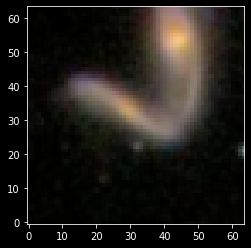

min 0.0 max 0.96862745 shape (64, 64, 3)


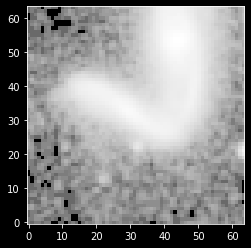

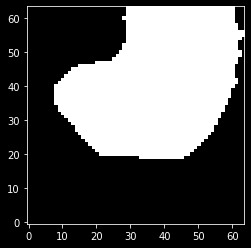

min 0.0 max 0.79699093 shape (64, 64)
min False max True shape (64, 64)


In [18]:
for image, label in data_loader:
    image = image[0].transpose(0,2)
    image = image.numpy()
    plt.imshow(image, origin='lower',
           norm=simple_norm(image, stretch='log', log_a=10000))
    plt.show()
    print_image_stats(image)
    image_bw = RGB2BW(image)
    segmap = get_segmentation_map(image_bw)
    plt.imshow(image_bw, cmap='gray', origin='lower',
           norm=simple_norm(image_bw, stretch='log', log_a=10000))
    plt.show()
    plt.imshow(segmap, origin='lower', cmap='gray')
    plt.show()

    print_image_stats(image_bw)
    print_image_stats(segmap)

    
    gain = 10000.0 # assume average of 10,000 electrons per pixel
    morphology_measures = statmorph.source_morphology(image_bw, segmap, gain=gain)
    
    break

In [19]:
import torch
from contextlib import ExitStack, redirect_stderr, redirect_stdout


def get_morphology_measures(image: torch.Tensor, 
                            gain: float = 10000.0, # assume average of 10,000 electrons per pixel
                            silent: bool = True
                           ):
    """ return the morphology measures of a galaxy in an RGB image """
    image = image[0].transpose(0,2)
    image = image.numpy()
    image_bw = RGB2BW(image)
    segmap = get_segmentation_map(image_bw)
    with ExitStack() as stack:
        if silent:
            stack.enter_context(redirect_stdout(open(os.devnull, 'w')))
            stack.enter_context(redirect_stderr(open(os.devnull, 'w')))
        morphology_measures = statmorph.source_morphology(image_bw, segmap, gain=gain)
    return morphology_measures[0]

In [21]:
for image, label in data_loader:
    morph = get_morphology_measures(image)
    break

## Morphology Statistics

Here we obtain morphology measures for a set of galaxy images and statistically compare the measures of several subsets

In [25]:
import types
from multiprocessing import Pool
from itertools import repeat


measures_of_interest = ["concentration", "asymmetry", "smoothness",
                        "multimode", "intensity", "deviation", 
                        "m20", "gini",
                        "ellipticity_asymmetry"
                       ]

def get_morphology_measures_set(set: types.GeneratorType,
                               measures_of_interest: list = measures_of_interest,
                               N: int = 30,
                               ):
    """ obtain morphology measures for a set of galaxy images """
    measures = {m:[] for m in measures_of_interest}
    for i, image in enumerate(set):
        if i > N:
            break
        morph = get_morphology_measures(image)
        for key, value in measures.items():
            value.append(getattr(morph, key))
    return measures

def collect_morphology_measures(image):
    """ obtain morphology measures from galaxy image and add to collection. 
        Picklable function for parallel loop
    """
    morph = get_morphology_measures(image)
    return morph


def get_morphology_measures_set_parallel(set: types.GeneratorType,
                                         measures_of_interest: list = measures_of_interest,
                                         N: int = 30):
    """ obtain morphology measures for a set of galaxy images
        parallel computation is about 6 times faster on 16 cores
    """
    if N > 0:
        set = [next(set) for i in range(N)]
    with Pool() as pool:
        morphs = pool.map(collect_morphology_measures, set)
    measures = {m:[] for m in measures_of_interest}
    for morph in morphs:
        for key, value in measures.items():
            value.append(getattr(morph, key))
    return measures
        
        

In [23]:
class Test:
    def __init__(self, x):
        self.x = x
        self.y = x*2

def func(x):
    return Test(x)

m = map(func, range(10))

d = {"x":[], "y":[]}

for m_ in m:
    for key, value in d.items():
        value.append(getattr(m_,key))

d

{'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]}

In [27]:
data_loader_valid = make_data_loader.get_data_loader_valid(batch_size=batch_size) #, num_workers=4)
image_loader_valid = (image for image, label in data_loader_valid)
%timeit measures_valid = get_morphology_measures_set_parallel(image_loader_valid, N=100)

# about 1.75 seconds for 30 images
#       5.16             100
#       2.6 minutes for 3000 images

5.16 s ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
data_loader_valid = make_data_loader.get_data_loader_valid(batch_size=batch_size, num_workers=4)
image_loader_valid = (image for image, label in data_loader_valid)
%timeit measures_valid = get_morphology_measures_set(image_loader_valid, N=100)

# about 12 seconds for 30 images
#       34            100



34.7 s ± 1.41 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
data_loader_test = make_data_loader.get_data_loader_valid(batch_size=batch_size, num_workers=4)
image_loader_test = (image for image, label in data_loader_test)
measures_test = get_morphology_measures_set(image_loader_test)

In [ ]:
len(measures_valid["m20"]), len(measures_test["m20"])

### Statistical Investigation

In [29]:
measures_groups = {"CAS": ["concentration", "asymmetry", "smoothness",],
                   "MID": ["multimode", "intensity", "deviation",],
                   "gini-m20": ["m20", "gini",],
                   "ellipticity": ["ellipticity_asymmetry",],
                  }




In [ ]:
from corner import corner

def plot_corner(*data, **kwargs):
    d = np.array(*data).T
    print(d.shape)
    corner(d, **kwargs)

    
def read_measures(keys: list, measures: dict ):
    """ obtain group of measures from full dict 
    
    Parameter
    ---------
    keys: list
        list of names (str) of measures to be read
    measures: dict
        full dict containing all measures
    """
    return [measures[k] for k in keys]

def read_measures_group(group: str, measures: dict):
    """ obtain group of measures from full dict 
    
    Parameter
    ---------
    group: str
        name of group of morphology measures. 
        One of "CAS", "MID", "gini-m20", "ellipticity"
        (keys of measures_groups)
    measures: dict
        full dict containing all measures
    """
    keys = measures_groups[group]
    return read_measures(keys, measures)
    
def plot_corner_measures_group(group: str, measures: dict, **kwargs):
    """ create corner plot of group of measures
    
    Parameter
    ---------
    group: str
        name of group of morphology measures. 
        One of "CAS", "MID", "gini-m20", "ellipticity"
        (keys of measures_groups)
    measures: dict
        full dict containing all measures
    """
    labels = [m for m in measures_groups[group]]
    data = read_measures_group(group, measures)
    plot_corner(data, labels=labels, **kwargs)
    
from chamferdist import ChamferDistance
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
    
def compute_distance_point_clouds_chamfer(points_source: torch.Tensor, points_target: torch.Tensor):
    """ compute the chamfer distance from source_points to target_points
    
    Parameter
    ---------
    source_points: torch.Tensor
        3D tensor of shape (N_batches, N_points, N_dimensions)
        contains points supposedly close to target points
    target_points: torch.Tensor
        3D tensor of shape (N_batches, N_points, N_dimensions)
        contains points from ground truth
        
    """
    chamfer_dist = ChamferDistance()
    dist = chamfer_dist(points_source.to(device), points_target.to(device))
    return dist.detach().cpu().item()
    
def transform_measures_to_points_chamfer(measures: dict):
    """ transform dict of measures to points needed to compute Chamfer distance
    
    Parameter
    ---------
    measures: dict
        contains M measures of interest (keys) for N samples (values)
        
    Output
    ------
    measures: torch.Tensor
        shape(1,N,M)
    
    """
    return torch.tensor([measures], requires_grad=False)

    
def compute_distance_measures_group(group: str, measures_source: dict, measures_target: dict, mode="chamfer", **kwargs):
    """ compute distance between points in group of measures
    
    Parameter
    ---------
    group: str
        name of group of morphology measures. 
        One of "CAS", "MID", "gini-m20", "ellipticity"
        (keys of measures_groups)
    measures: dict
        full dict containing all measures
    """
    if mode == "chamfer":
        compute_distance_point_clouds = compute_distance_point_clouds_chamfer
        transform_measures = transform_measures_to_points_chamfer
    measures_source = read_measures_group(group, measures_source)
    measures_target = read_measures_group(group, measures_target)
    points_source = transform_measures(measures_source)
    points_target = transform_measures(measures_target)
    return compute_distance_point_clouds(points_source, points_target)


In [ ]:
for group in measures_groups.keys():
    plot_corner_measures_group(group, measures_valid, color="w")
    plot_corner_measures_group(group, measures_test, color="w")
    plt.show()
    print(compute_distance_measures_group(group, measures_valid, measures_test))
    